In [1]:
import os
import json
import requests
import numpy as np
from io import BytesIO
from IPython.display import display
from PIL import Image, ImageDraw, ImageFont

In [2]:
def draw(image_url, items):
    r = requests.get(image_url)
    im = Image.open(BytesIO(r.content))
    draw = ImageDraw.Draw(im)
    font = ImageFont.truetype('arial.ttf', 16, encoding='unic')
    for item in items:
        draw.rectangle([item['x'], 
                        item['y'], 
                        item['x'] + item['width'], 
                        item['y'] + item['height']], outline='#FF0000')
                        
        s = '{0} ({1:.0%})'.format(item['label'], item['confidence'])
        draw.text((item['x'], item['y']), 
                  s, 
                  font=font, fill=(255, 255, 255, 255))
    del draw
    return im

In [21]:
service = 'http://13.68.203.69:80/score'
#image_url = 'https://i.pinimg.com/originals/60/3e/66/603e6638168e2656d50cc78a34a561ef.jpg'
#image_url = 'https://my100yearoldhome.com/wp-content/uploads/2017/04/Rae-Dunn-Pottery-Collection.jpg'
image_url = 'https://thumbs.dreamstime.com/z/red-yellow-white-dishes-cups-shelves-store-dishes-display-99263287.jpg'
#image_url = 'https://media-cdn.tripadvisor.com/media/photo-s/06/91/aa/af/kingsbury-of-tahoe.jpg'


In [25]:
r = requests.post(service, json={'image': image_url, 'confidence': .2})   
response = json.loads(r.json())

In [26]:
print(response)

{'image': 'https://thumbs.dreamstime.com/z/red-yellow-white-dishes-cups-shelves-store-dishes-display-99263287.jpg', 'time': 1.828447, 'predictions': [{'width': 199.0618438720703, 'label': 'cup', 'x': 271.01776123046875, 'y': 378.2981872558594, 'confidence': 0.9529626369476318, 'height': 184.78128051757812}, {'width': 167.47412109375, 'label': 'cup', 'x': 198.83538818359375, 'y': 93.30623626708984, 'confidence': 0.9938323497772217, 'height': 190.07342529296875}, {'width': 180.97972106933594, 'label': 'cup', 'x': 75.07299041748047, 'y': 385.0722351074219, 'confidence': 0.9856300950050354, 'height': 176.78500366210938}, {'width': 165.1962432861328, 'label': 'cup', 'x': 8.174586296081543, 'y': 87.65557098388672, 'confidence': 0.9776524305343628, 'height': 192.95042419433594}, {'width': 118.01350402832031, 'label': 'cup', 'x': 311.3555603027344, 'y': 71.61177062988281, 'confidence': 0.9962202906608582, 'height': 165.49066162109375}, {'width': 142.6144561767578, 'label': 'cup', 'x': 148.8379

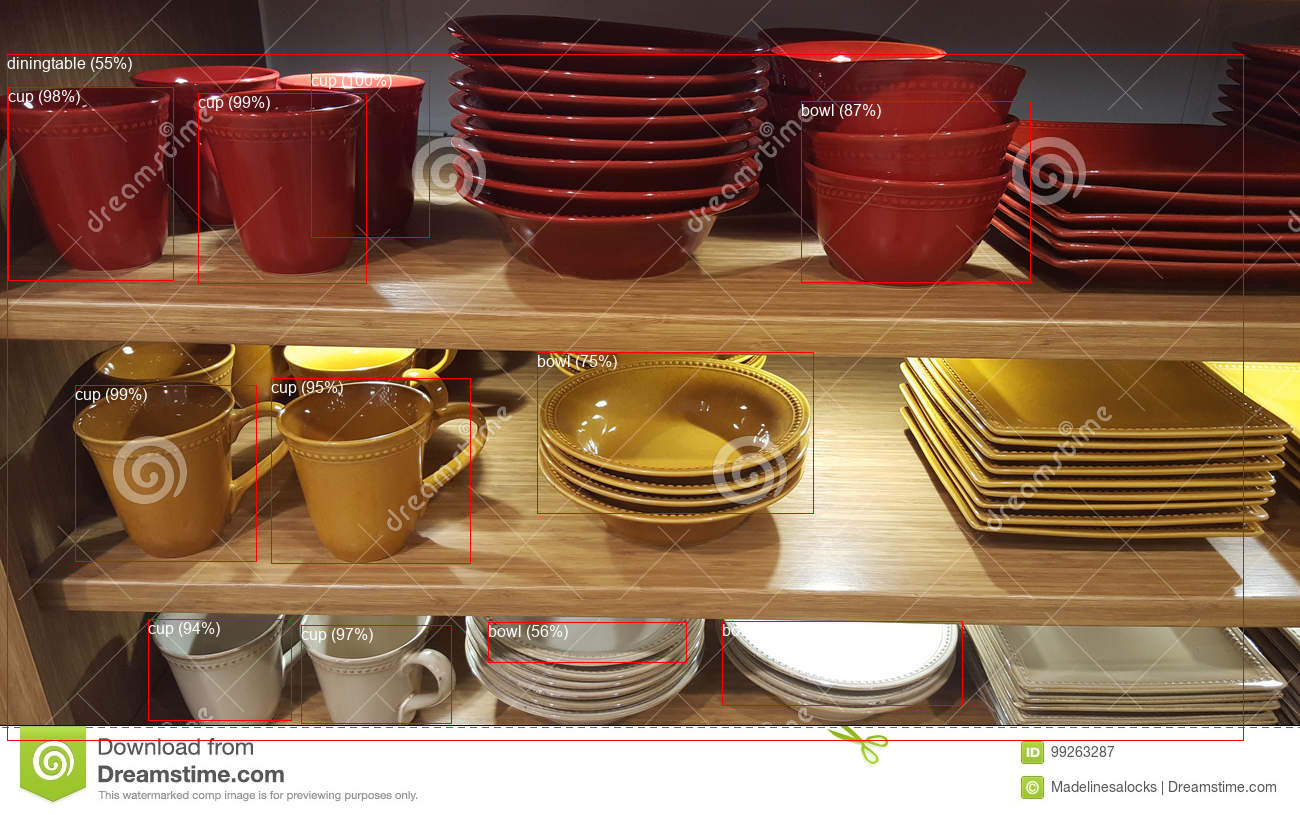

In [27]:
img = draw(image_url, response['predictions'])
display(img)